# Assignment 3 Group 27

* Daniyal Khalid 03748318
* Saqib Ali Khan 03750897
* Mujtaba Shahid Faizi 03749649
* Utku Ayvaz 03690266
* Weixing Wang 03698938

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os
import imageio

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

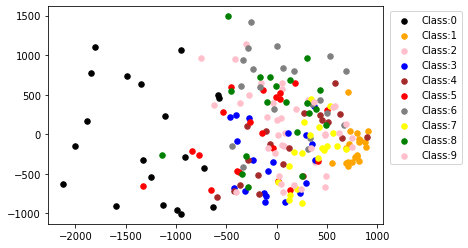

In [8]:
# Insert Code for Subtask 1.1 here
# Get Images
def get_image(image_num, class_path):
    
    #Get all the files in the folder 
    filelist=os.listdir('mnist/'+class_path)
    
    #Get the png files in the given folder
    for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
        if not(fichier.endswith(".png")):
            filelist.remove(fichier)
    
    #Get the selected Image
    image_name = filelist[image_num]
    im = imageio.imread('mnist/'+class_path+"/"+image_name)
    return im.ravel()

# helper function to calculate pca scores for K=2
def get_scores(X):
    scores = linear_pca(X, 2)
    return scores

# helper function to plot pca scores in 2D
def plot_scores(scores):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    colors = ["black","orange","pink","blue","brown","red","grey","yellow","green","pink"]
    for i in range(10):
        ax1.scatter(scores[0,int(scores.shape[1]//10*i):int(scores.shape[1]//10*(i+1))], scores[1,int(scores.shape[1]//10*i):int(scores.shape[1]//10*(i+1))], s=30, c=colors[i], marker="o", label="Class:"+str(i))
    plt.legend(bbox_to_anchor=(1.25, 1),loc='upper right');
    plt.show()

    
image_range=20
X = np.empty((784, image_range*10))
for class_number in range(10):
    #Get class name in the mnist folder
    class_path = "d"+str(class_number)
    image_choices = np.random.randint(len(os.listdir('mnist/'+class_path)), size=image_range)
    for i in range(image_range):
        image_num = int(image_choices[i])
        X[:,i+image_range*class_number] = get_image(image_num, class_path)
scores=get_scores(X)
plot_scores(scores)

In [9]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    
    # Compute centered K with the standard formula
    H = np.eye(K.shape[1])-(np.ones((K.shape[1],K.shape[1]))/K.shape[1])
    K_centered = H@K@H
    
    # Get score from first k vectors
    [U,Sigma,VT]=np.linalg.svd(K_centered,full_matrices=False)
    S = np.expand_dims(Sigma[:k]**0.5,axis=1)*VT[:k,:]

    return S

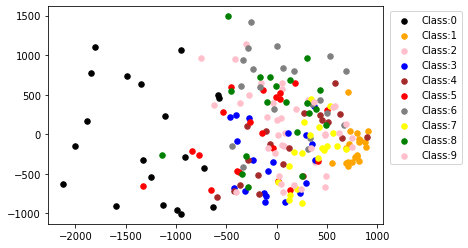

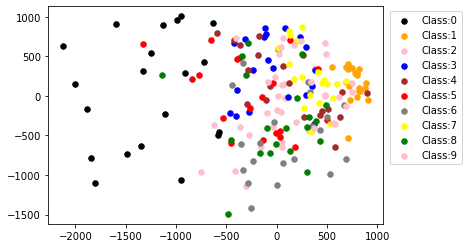

173832.18638096942


In [10]:
# Insert Code for Subtask 1.3 here
# Helper function to get PCA using linear kernel for 2 dimensions
def get_kernel_scores(X):
    scores = gram_pca(X.T@X, 2)
    return scores

# Compare scores for regular PCA and PCA using linear kernel
scores1 = get_scores(X)
scores2 = get_kernel_scores(X)
plot_scores(scores1)
plot_scores(scores2)

print(np.sum(np.abs(scores1[1,:]-scores2[1,:])))

In [11]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    #Calculate the Gramm matrix for the Gaussian kernel
    K = np.empty((X.shape[1],X.shape[1]))
    for i in range(X.shape[1]):
        for s in range(X.shape[1]):
            X_minus = np.expand_dims(X[:,i]-X[:,s],axis=1)
            K[i,s] = np.exp(-(X_minus.T@X_minus)/(2*(sigma**2))) 
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

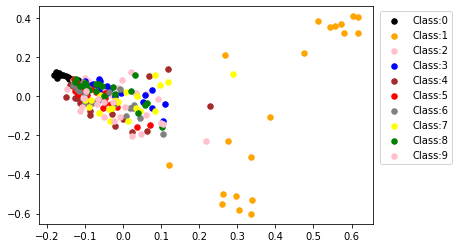

In [12]:
#Insert Code for Subtask 1.5 here
G_scores = gaussian_kernel_pca(X, 2, 1000)
plot_scores(G_scores)